# Part 3: Advanced Text Processing - LDA and BERTopic Topic Modeling (20 pts)

In [30]:
from bertopic import BERTopic
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
import pyLDAvis.gensim_models
import spacy
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [31]:
sou = pd.read_csv('data/SOTU.csv')
nlp = spacy.load("en_core_web_sm")
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


In [32]:
def preprocess_text(text): 
    doc = nlp(text) 
    return [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space and len(token.lemma_) > 3]

In [33]:
processed_docs = sou['Text'].apply(preprocess_text)

In [34]:
dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [35]:
lda_model = LdaModel(corpus=corpus, num_topics=18, id2word=dictionary, random_state=42)

In [36]:
print("--- LDA Topics ---")
for topic, words in lda_model.print_topics(num_topics=-1):
    print(f"Topic: {topic}")
    print("Words:", words)
    print()

--- LDA Topics ---
Topic: 0
Words: 0.011*"government" + 0.009*"year" + 0.007*"country" + 0.007*"states" + 0.005*"united" + 0.005*"congress" + 0.005*"people" + 0.004*"public" + 0.004*"great" + 0.004*"nation"

Topic: 1
Words: 0.010*"states" + 0.009*"year" + 0.008*"congress" + 0.007*"government" + 0.006*"people" + 0.006*"great" + 0.006*"nation" + 0.005*"united" + 0.005*"country" + 0.005*"time"

Topic: 2
Words: 0.014*"year" + 0.007*"government" + 0.006*"people" + 0.006*"states" + 0.005*"time" + 0.005*"great" + 0.005*"country" + 0.005*"work" + 0.005*"congress" + 0.005*"nation"

Topic: 3
Words: 0.010*"government" + 0.009*"united" + 0.008*"congress" + 0.008*"states" + 0.007*"nation" + 0.007*"year" + 0.006*"country" + 0.006*"people" + 0.005*"state" + 0.004*"great"

Topic: 4
Words: 0.010*"government" + 0.009*"year" + 0.006*"people" + 0.006*"congress" + 0.006*"united" + 0.006*"country" + 0.006*"states" + 0.005*"great" + 0.004*"state" + 0.004*"time"

Topic: 5
Words: 0.011*"government" + 0.008*"co

In [37]:
first_speech = corpus[0]
lda_model.get_document_topics(first_speech)

[(2, 0.9985286)]

In [39]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.010622 -0.001251       1        1  17.115686
2      0.011838 -0.000912       2        1  15.419500
7      0.000654 -0.002225       3        1  14.512708
17    -0.001919 -0.002001       4        1  12.294047
6     -0.004280 -0.001540       5        1   8.304431
8      0.002731  0.001767       6        1   7.243116
0      0.000499 -0.001975       7        1   4.693845
12    -0.006242  0.003161       8        1   4.363039
3     -0.001943 -0.000031       9        1   3.805053
14     0.003122 -0.002060      10        1   3.486394
1      0.000791  0.000360      11        1   2.055211
13     0.001031 -0.001927      12        1   1.692301
15    -0.003763  0.001190      13        1   1.232035
11     0.006729  0.002632      14        1   1.123771
5     -0.001000  0.001533      15        1   1.029751
4      0.001458 -0.000362      16        1   0.889842
9      0.000183  0.002443      17        1   0.505534
16     0.000731  0.001200      18        1   0.233734, topic_info=            Term         Freq        Total Category  logprob  loglift
1524  government  8391.000000  8391.000000  Default  30.0000  30.0000
1249        year  7279.000000  7279.000000  Default  29.0000  29.0000
1065      states  6521.000000  6521.000000  Default  28.0000  28.0000
223     congress  5060.000000  5060.000000  Default  27.0000  27.0000
807       people  4233.000000  4233.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
737     national     4.845735  2262.381633  Topic18  -5.9694  -0.0873
50       america     4.617492  2037.668981  Topic18  -6.0177  -0.0310
957        right     4.808740  2312.039534  Topic18  -5.9771  -0.1167
560     increase     4.766406  2645.410890  Topic18  -5.9859  -0.2602
1579    interest     4.701028  2700.376345  Topic18  -5.9997  -0.2946

[1677 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
9242      1  0.194541    --in
9242      2  0.194541    --in
9242      3  0.194541    --in
9242      6  0.194541    --in
9253      1  0.078927    --to
...     ...       ...     ...
1249     15  0.007693    year
1249     16  0.009066    year
1249     17  0.004396    year
1249     18  0.001511    year
6667      2  0.233918  zarfos

[8752 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 3, 8, 18, 7, 9, 1, 13, 4, 15, 2, 14, 16, 12, 6, 5, 10, 17])

In [40]:
docs = sou['Text'].to_list()

In [41]:
topic_model = BERTopic(min_topic_size=3)
topics, probs = topic_model.fit_transform(docs)
vectorizer_model = CountVectorizer(stop_words="english")
topic_model.update_topics(docs, vectorizer_model=vectorizer_model)

In [42]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,60,-1_government_states_united_congress,"[government, states, united, congress, year, p...",[\nJump toPart II |Part III\nPart 1. [On Our F...
1,0,22,0_world_people_new_american,"[world, people, new, american, america, years,...","[\nMr. Speaker, Mr. President, my colleagues i..."
2,1,19,1_states_united_government_public,"[states, united, government, public, congress,...",[\nTo the Senate and House of Representatives:...
3,2,13,2_america_american_americans_people,"[america, american, americans, people, tonight...","[\nThe President. Mr. Speaker, Mr. Vice Presid..."
4,3,13,3_states_government_public_united,"[states, government, public, united, congress,...",[\nFellow-Citizens of the Senate and House of ...
5,4,12,4_world_nations_soviet_peace,"[world, nations, soviet, peace, economic, free...","[\nMr. President, Mr. Speaker, Members of the ..."
6,5,12,5_government_states_united_year,"[government, states, united, year, law, congre...",[\nTo the Senate and House of Representatives:...
7,6,9,6_government_work_public_congress,"[government, work, public, congress, great, la...",[\nTo the Senate and House of Representatives:...
8,7,8,7_america_new_jobs_tonight,"[america, new, jobs, tonight, thats, years, am...","[\nMadam Speaker, Mr. Vice President, Members ..."
9,8,8,8_states_united_government_constitution,"[states, united, government, constitution, sta...",[\nTo the Senate and House of Representatives:...


In [43]:
topic_distr, _ = topic_model.approximate_distribution(docs, min_similarity=0)
topic_model.visualize_distribution(topic_distr[0])

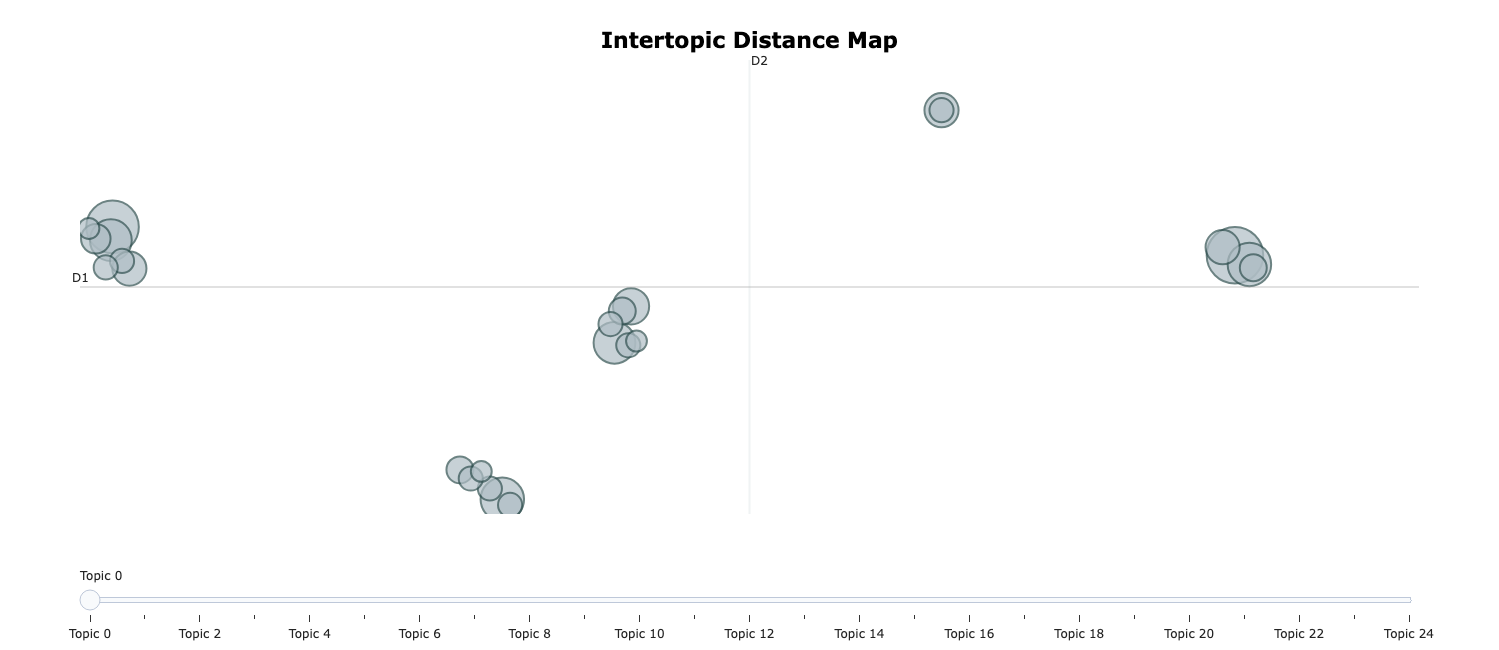

In [44]:
topic_model.visualize_topics()